<a href="https://colab.research.google.com/github/FediBeltaief/AIChatBot/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercice 1**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, ConfusionMatrixDisplay

iris = datasets.load_iris()

print("Classes disponibles: ", iris.target_names)


Classes disponibles:  ['setosa' 'versicolor' 'virginica']


In [23]:
X= iris.data[iris.target != 2]
y= iris.target[iris.target != 2]

X = X[:,:2]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify =y)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

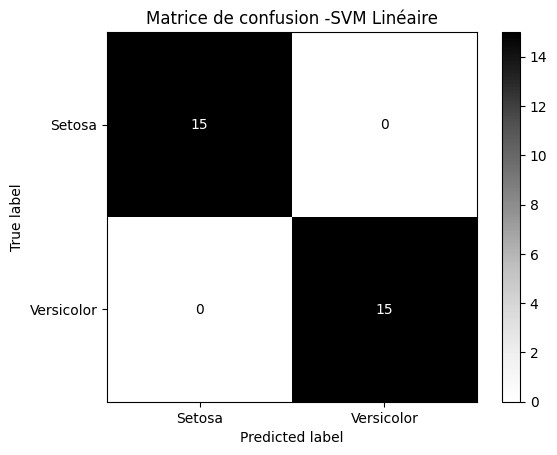

1.0

In [24]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa','Versicolor'])
disp.plot(cmap = plt.cm.Grays)
plt.title("Matrice de confusion -SVM Linéaire")
plt.show()

accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)


In [25]:

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score:",f1_score(y_test, y_pred))

Accuracy:  1.0
Precision: 1.0
Recall:  1.0
F1-Score: 1.0


## **Exercice 2**

Classes disponibles:  ['setosa' 'versicolor' 'virginica']


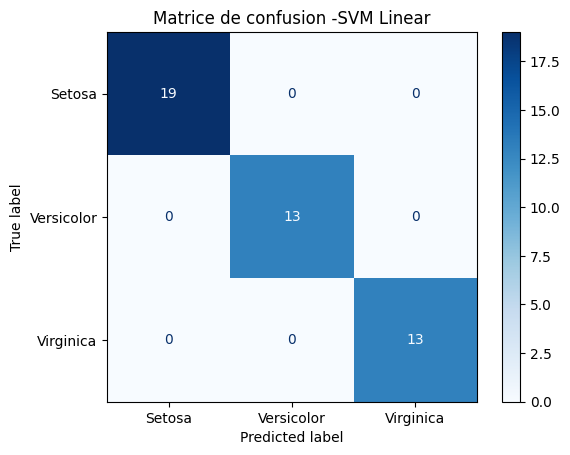

Accuracy:  1.0
Precision: 1.0
Recall:  1.0
F1-Score: 1.0


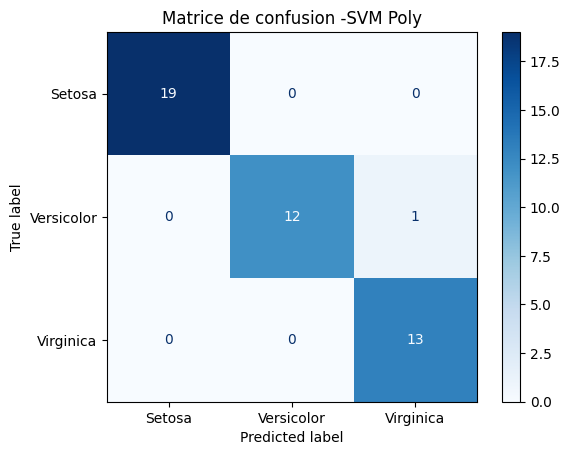

Accuracy:  0.9777777777777777
Precision: 0.9777777777777777
Recall:  0.9777777777777777
F1-Score: 0.9777777777777777


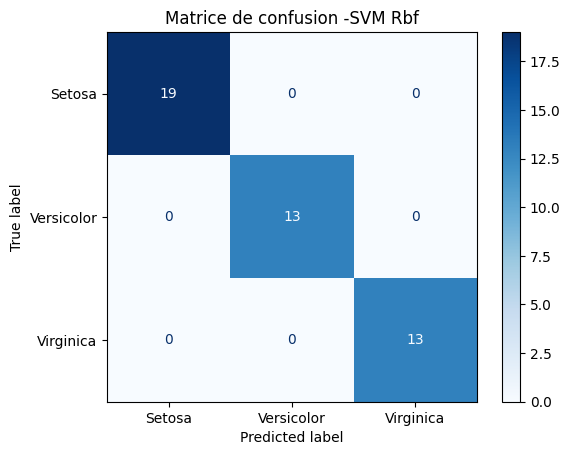

Accuracy:  1.0
Precision: 1.0
Recall:  1.0
F1-Score: 1.0


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, ConfusionMatrixDisplay

iris = datasets.load_iris()

print("Classes disponibles: ", iris.target_names)

X= iris.data
y= iris.target
L=['linear','poly','rbf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for i in L:
  if  i =='poly':
    model = SVC(kernel=i,degree = 3)
  else:
    model = SVC(kernel=i)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa','Versicolor','Virginica'])
  disp.plot(cmap = plt.cm.Blues)
  plt.title(f"Matrice de confusion -SVM {i.capitalize()}")
  plt.show()

  #accuracy_score(y_test, y_pred)
  #precision_score(y_test, y_pred, average='micro')
  #recall_score(y_test, y_pred, average='micro')
  #f1_score(y_test, y_pred)


  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred ,average='micro'))
  print("Recall: ", recall_score(y_test, y_pred ,average='micro'))
  print("F1-Score:",f1_score(y_test, y_pred ,average='micro'))

## **Exercice 3**

In [27]:
from google.colab import drive
drive.mount('/content/drive')

data_path='content/drive/MyDrive/Covid19-dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import os
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [29]:
def load_images_from_folder(folder,label,size=(64,64)):
  images = []
  labels = []
  for filename in os.listdir(folder):
    path = os.path.join(folder,filename)
    try:
      img = load_img(path,target_size=size, color_mode='grayscale')
      img_array =img_to_array(img).flatten()
      images.append(img_array)
      labels.append(label)
    except:
      continue
  return images,labels

In [30]:
train_covid = os.path.join(data_path,'train/Covid')
train_normal = os.path.join(data_path,'train/Normal')
test_covid = os.path.join(data_path,'test/Covid')
test_normal = os.path.join(data_path,'test/Normal')

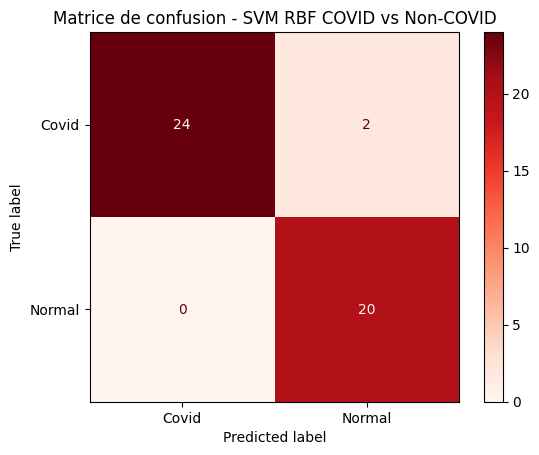

Accuracy : 0.96
Precision : 0.96
Recall : 0.96
F1 Score : 0.96


In [31]:
import os
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


data_path='/content/drive/MyDrive/Covid19-dataset'
train_covid = os.path.join(data_path,'train/Covid')
train_normal = os.path.join(data_path,'train/Normal')
test_covid = os.path.join(data_path,'test/Covid')
test_normal = os.path.join(data_path,'test/Normal')


X_train_covid,y_train_covid = load_images_from_folder(train_covid,"Covid")
X_train_normal,y_train_normal = load_images_from_folder(train_normal,"Normal")
X_test_covid,y_test_covid = load_images_from_folder(test_covid,"Covid")
X_test_normal,y_test_normal = load_images_from_folder(test_normal,"Normal")

X_train = np.array(X_train_covid + X_train_normal)
y_train = np.array(y_train_covid + y_train_normal)
X_test = np.array(X_test_covid + X_test_normal)
y_test = np.array(y_test_covid + y_test_normal)


le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train_enc)


y_pred = svm_model.predict(X_test_scaled)
cm = confusion_matrix(y_test_enc, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Matrice de confusion - SVM RBF COVID vs Non-COVID")
plt.show()


accuracy = accuracy_score(y_test_enc, y_pred)
precision = precision_score(y_test_enc, y_pred, average='micro')
recall = recall_score(y_test_enc, y_pred, average='micro')
f1 = f1_score(y_test_enc, y_pred, average='micro')

print("Accuracy :", round(accuracy, 2))
print("Precision :", round(precision, 2))
print("Recall :", round(recall, 2))
print("F1 Score :", round(f1, 2))